<a href="https://colab.research.google.com/github/SowjanyaKiran/sowjanya-/blob/main/NUMPY%2C_PANDAS%2C_MATPLOTLIB%2C_AND_SEABORN_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload
df = pd.read_csv("/content/Iris.csv")
df2 = pd.read_csv("/content/titanic.csv")
df3 = pd.read_csv("/content/tips.csv")

In [3]:
print(df.info())      # Overview of dataset
print(df.describe())  # Summary statistics
print(df.head())      # First 5 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000    

In [4]:
print(df2.info())      # Overview of dataset
print(df2.describe())  # Summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [5]:
print(df3.info())      # Overview of dataset
print(df3.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [6]:
arr = np.array([1, 2, 3, 4, 5])
print('array :\n' , arr)
print('type :' , type(arr))
print('data type : ' , arr.dtype)
print('dimension : ' , arr.ndim)
print('shape : ' , arr.shape)
print('size : ' , arr.size)

array :
 [1 2 3 4 5]
type : <class 'numpy.ndarray'>
data type :  int64
dimension :  1
shape :  (5,)
size :  5


In [7]:
arr1 = arr * 2 #Element-wise multiplication
arr2 = np.sqrt(arr) #Element-wise square root calculation
print(arr1, arr2)

[ 2  4  6  8 10] [1.         1.41421356 1.73205081 2.         2.23606798]


In [8]:
# Select specific columns
print(df2[['Name', 'Age', 'Survived']].head())

                                                Name   Age  Survived
0                            Braund, Mr. Owen Harris  22.0         0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0         1
2                             Heikkinen, Miss. Laina  26.0         1
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0         1
4                           Allen, Mr. William Henry  35.0         0


In [9]:
df2.dropna(subset=['Embarked'], inplace=True)

In [10]:
older_passengers = df2[df2['Age'] > 50]

# Calculate survival rate among older passengers
survival_rate = older_passengers['Survived'].mean()  # Mean of Survived (1 = survived, 0 = not survived)

# Display results
print("Passengers older than 50:")
print(older_passengers[['Name', 'Age', 'Survived']])

print("\nSurvival Rate of Passengers Older than 50: {:.2f}%".format(survival_rate * 100))


Passengers older than 50:
                                                  Name   Age  Survived
6                              McCarthy, Mr. Timothy J  54.0         0
11                            Bonnell, Miss. Elizabeth  58.0         1
15                    Hewlett, Mrs. (Mary D Kingcome)   55.0         1
33                               Wheadon, Mr. Edward H  66.0         0
54                      Ostby, Mr. Engelhart Cornelius  65.0         0
..                                                 ...   ...       ...
774              Hocking, Mrs. Elizabeth (Eliza Needs)  54.0         1
820  Hays, Mrs. Charles Melville (Clara Jennings Gr...  52.0         1
851                                Svensson, Mr. Johan  74.0         0
857                             Daly, Mr. Peter Denis   51.0         1
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  56.0         1

[63 rows x 3 columns]

Survival Rate of Passengers Older than 50: 33.33%


In [11]:
survival_rate = df2.groupby('Pclass')['Survived'].mean()
print(survival_rate)

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [12]:
df2['Age_normalized'] = (df2['Age'] - df2['Age'].min()) / (df2['Age'].max() - df2['Age'].min())
df2['Fare_log'] = np.log(df2['Fare'] + 1)
print(df2[['Age_normalized', 'Fare_log']].head())

   Age_normalized  Fare_log
0        0.271174  2.110213
1        0.472229  4.280593
2        0.321438  2.188856
3        0.434531  3.990834
4        0.434531  2.202765


# **Iris dataset Basic visualization using Pandas, Matplotlib & Seaborn**

Text(0, 0.5, '#Petal Length')

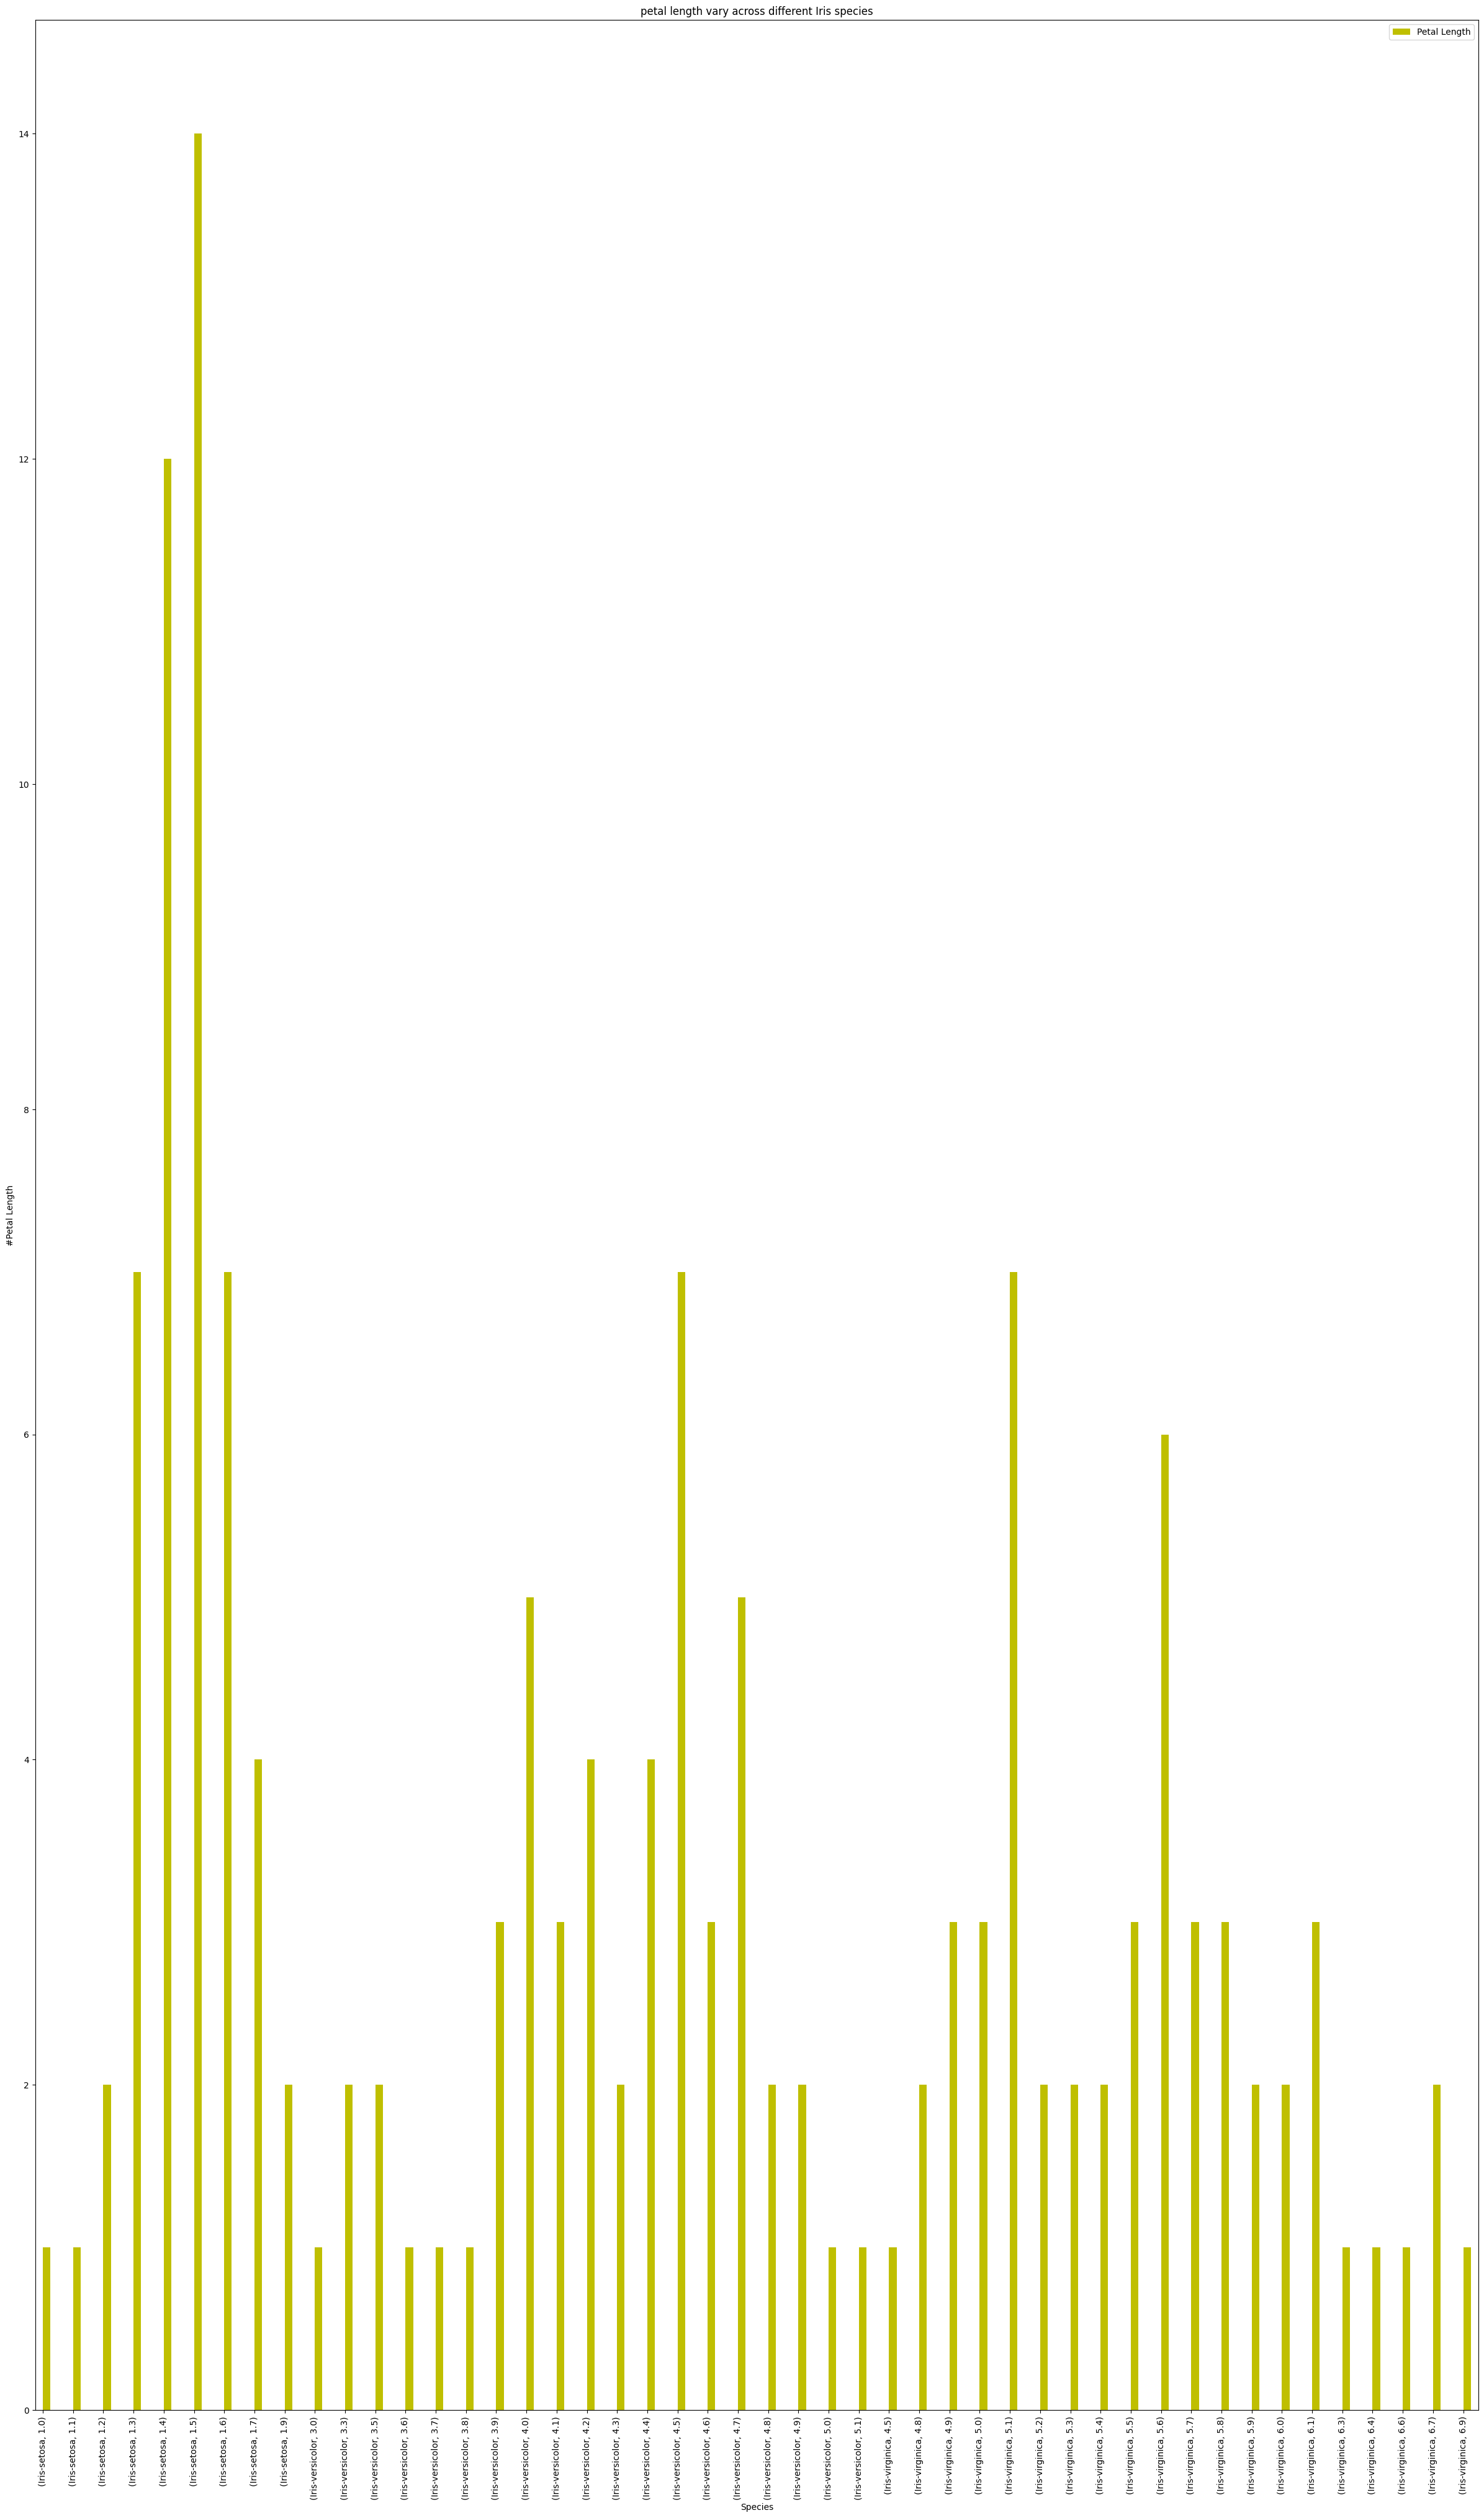

In [14]:
data_petalength = df.groupby(["Species", "PetalLengthCm"])["PetalLengthCm"].count()
data_petalength.plot(kind="bar", color="y", legend=True, position=0, width=0.25, label="Petal Length")
plt.rcParams["figure.figsize"] = (30, 50)
plt.title('petal length vary across different Iris species')
plt.xlabel("Species")
plt.ylabel("#Petal Length")

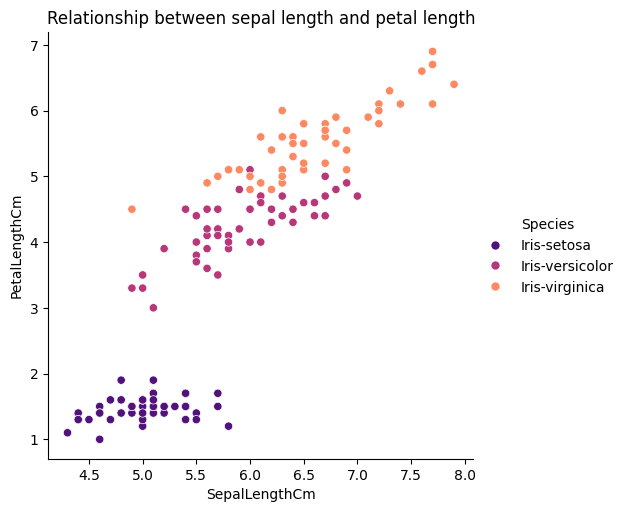

In [15]:
sns.relplot(x ="SepalLengthCm", y ="PetalLengthCm",  hue ="Species", data = df, palette='magma');
#sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm',hue ="Species", data=data, palette='magma')
plt.title('Relationship between sepal length and petal length')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.show()

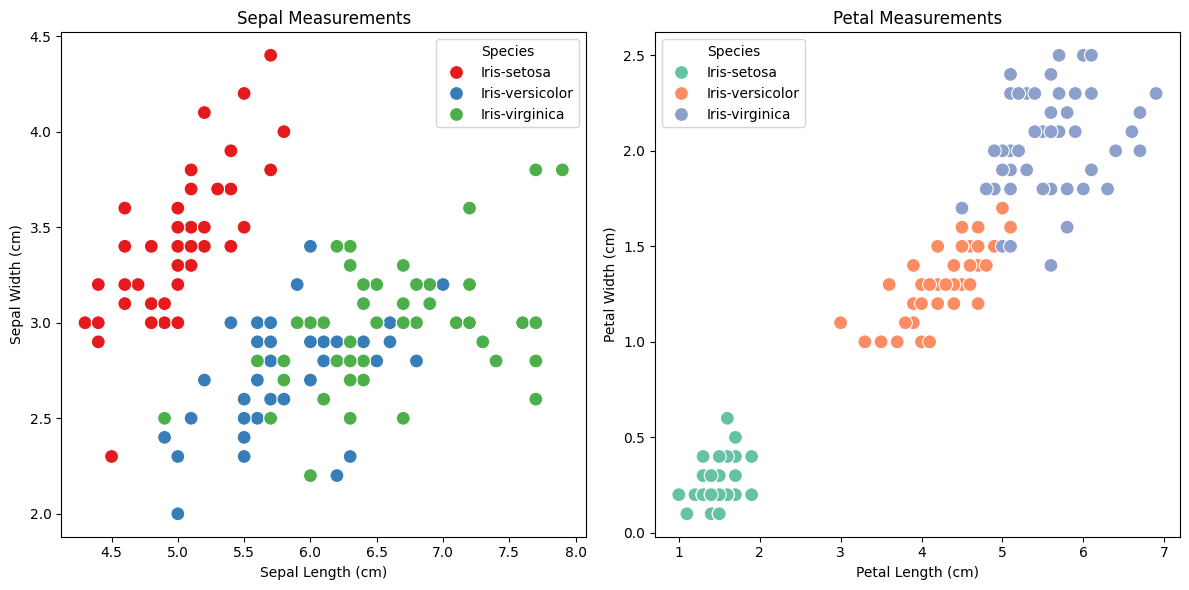

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df,x="SepalLengthCm",y="SepalWidthCm",hue="Species",palette="Set1",s=100)
plt.title("Sepal Measurements")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df,x="PetalLengthCm",y="PetalWidthCm",hue="Species",palette="Set2",s=100)
plt.title("Petal Measurements")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

plt.tight_layout()
plt.show()

# **Titanic dataset Basic visualization using Pandas, Matplotlib & Seaborn**

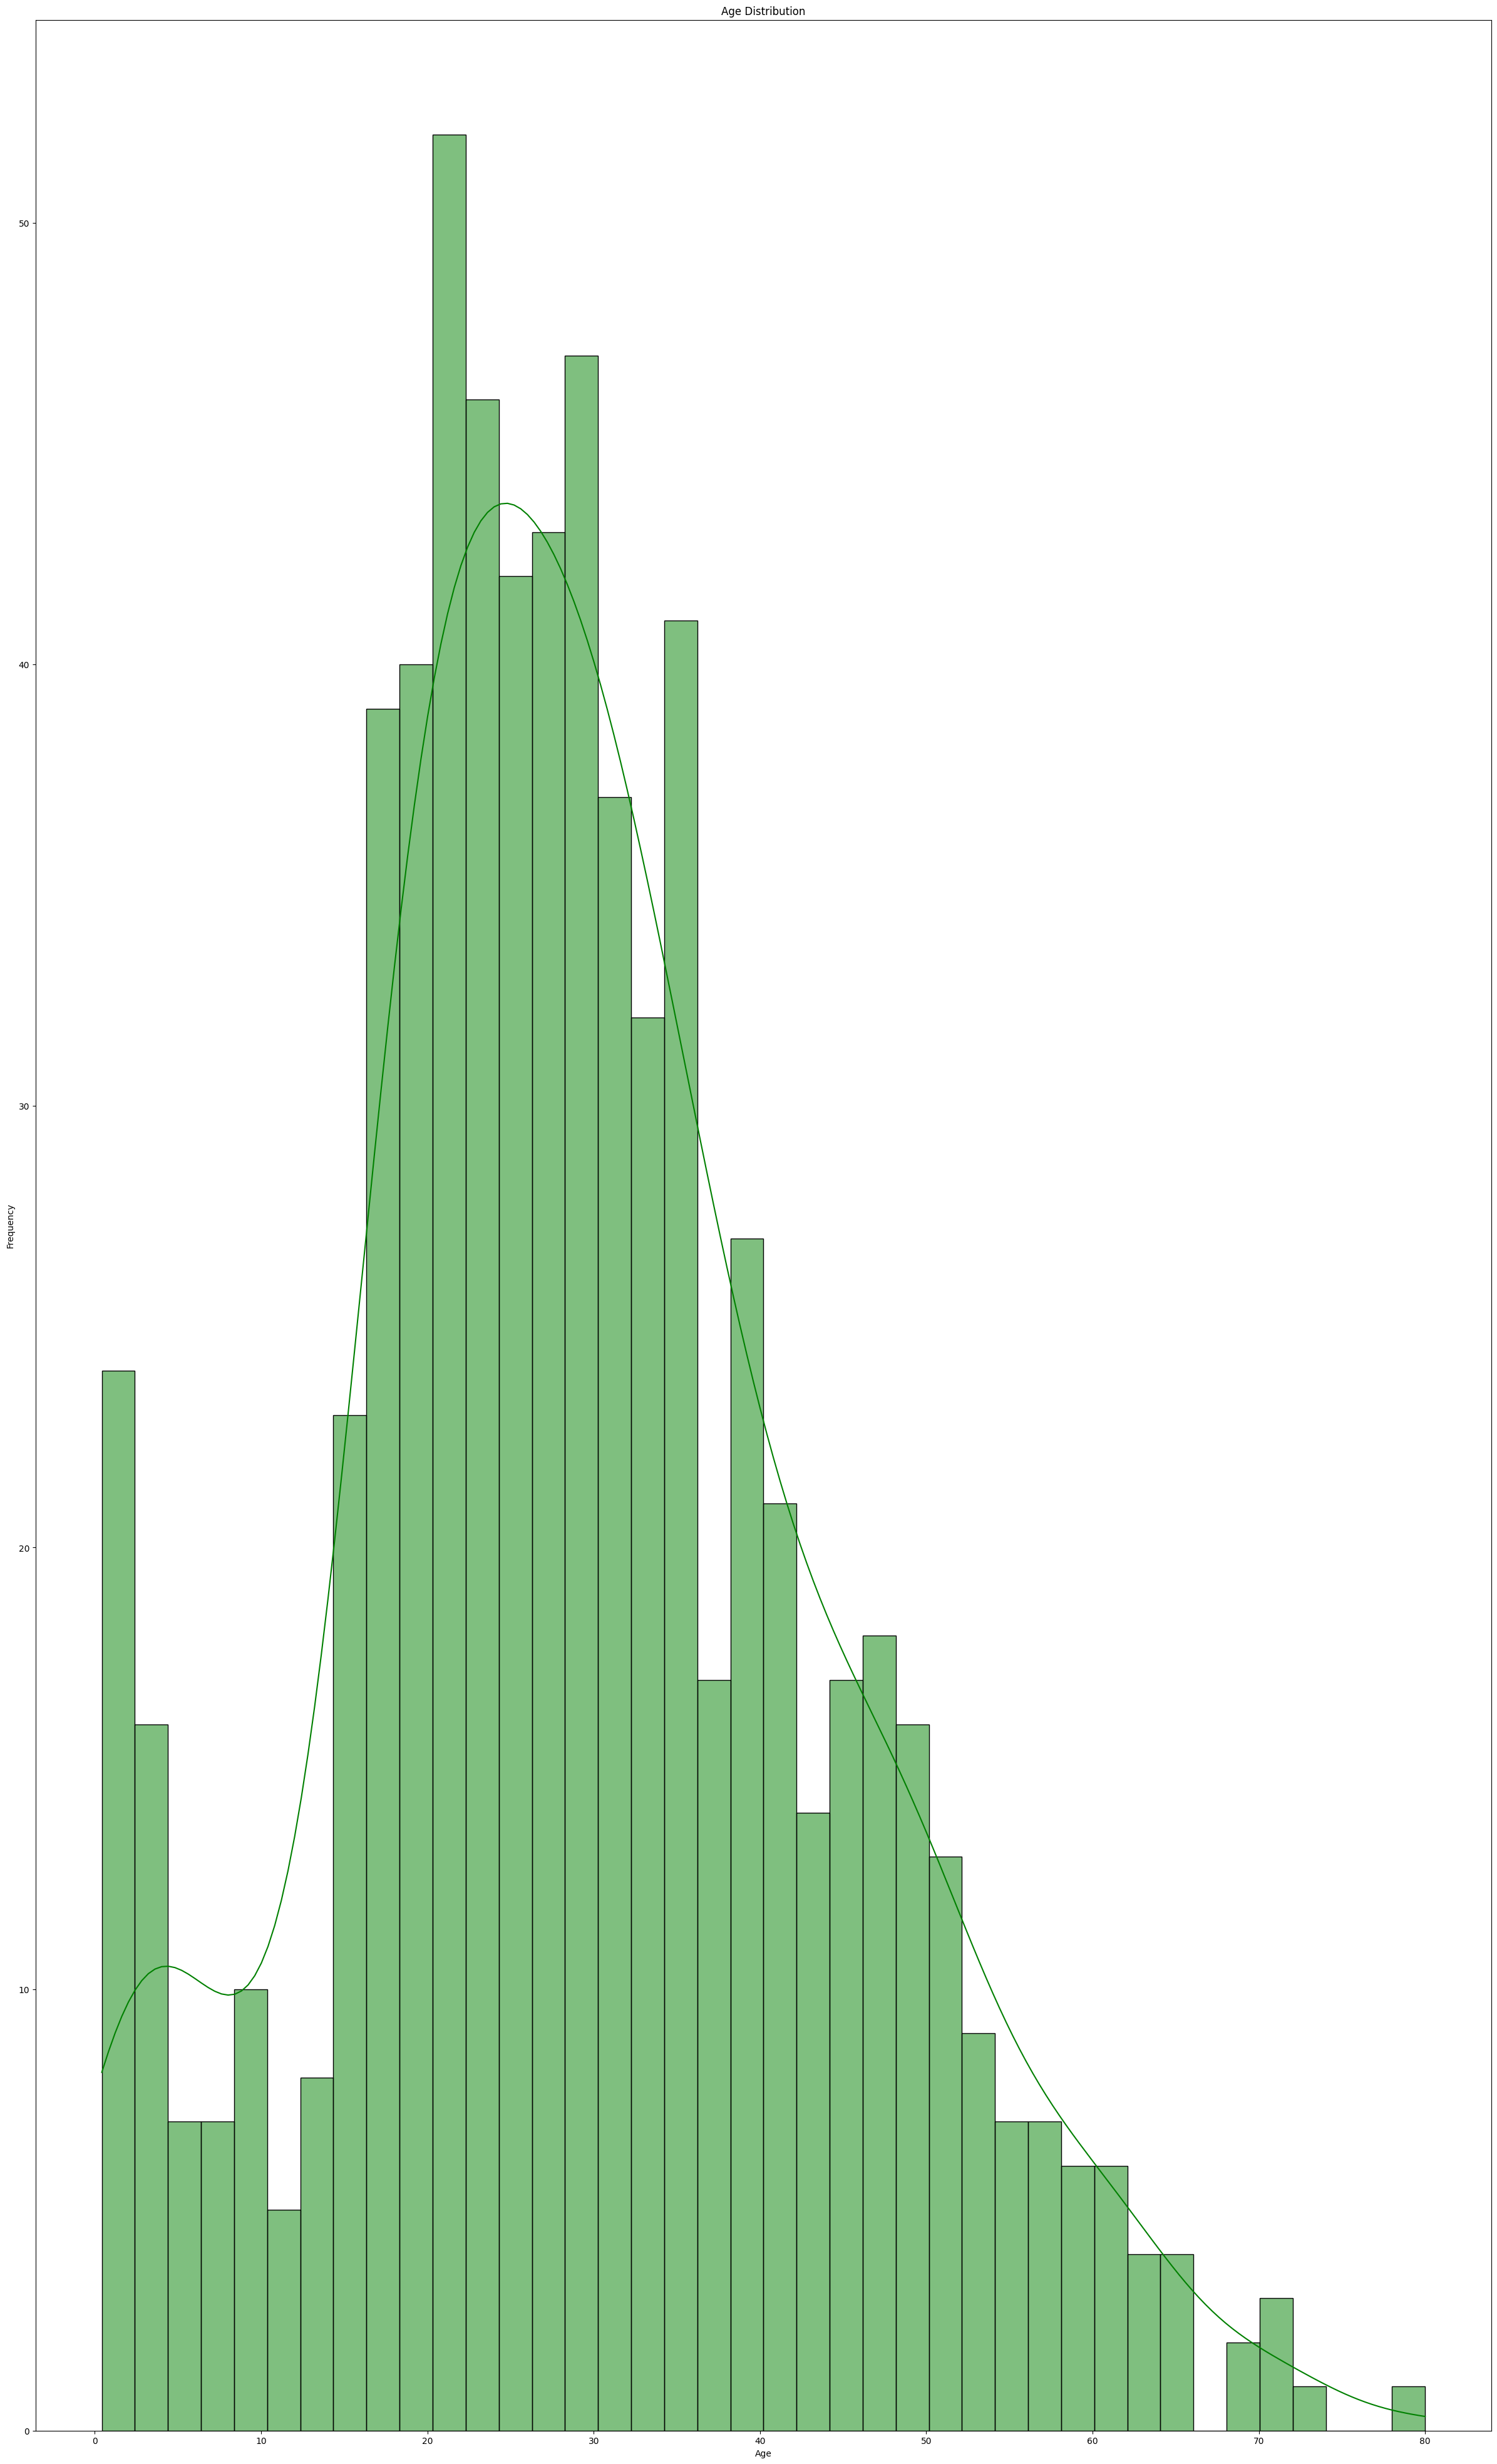

In [17]:
sns.histplot(df2['Age'], bins=40, kde=True, color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-18-3068150eb8b9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df2 , palette='magma')


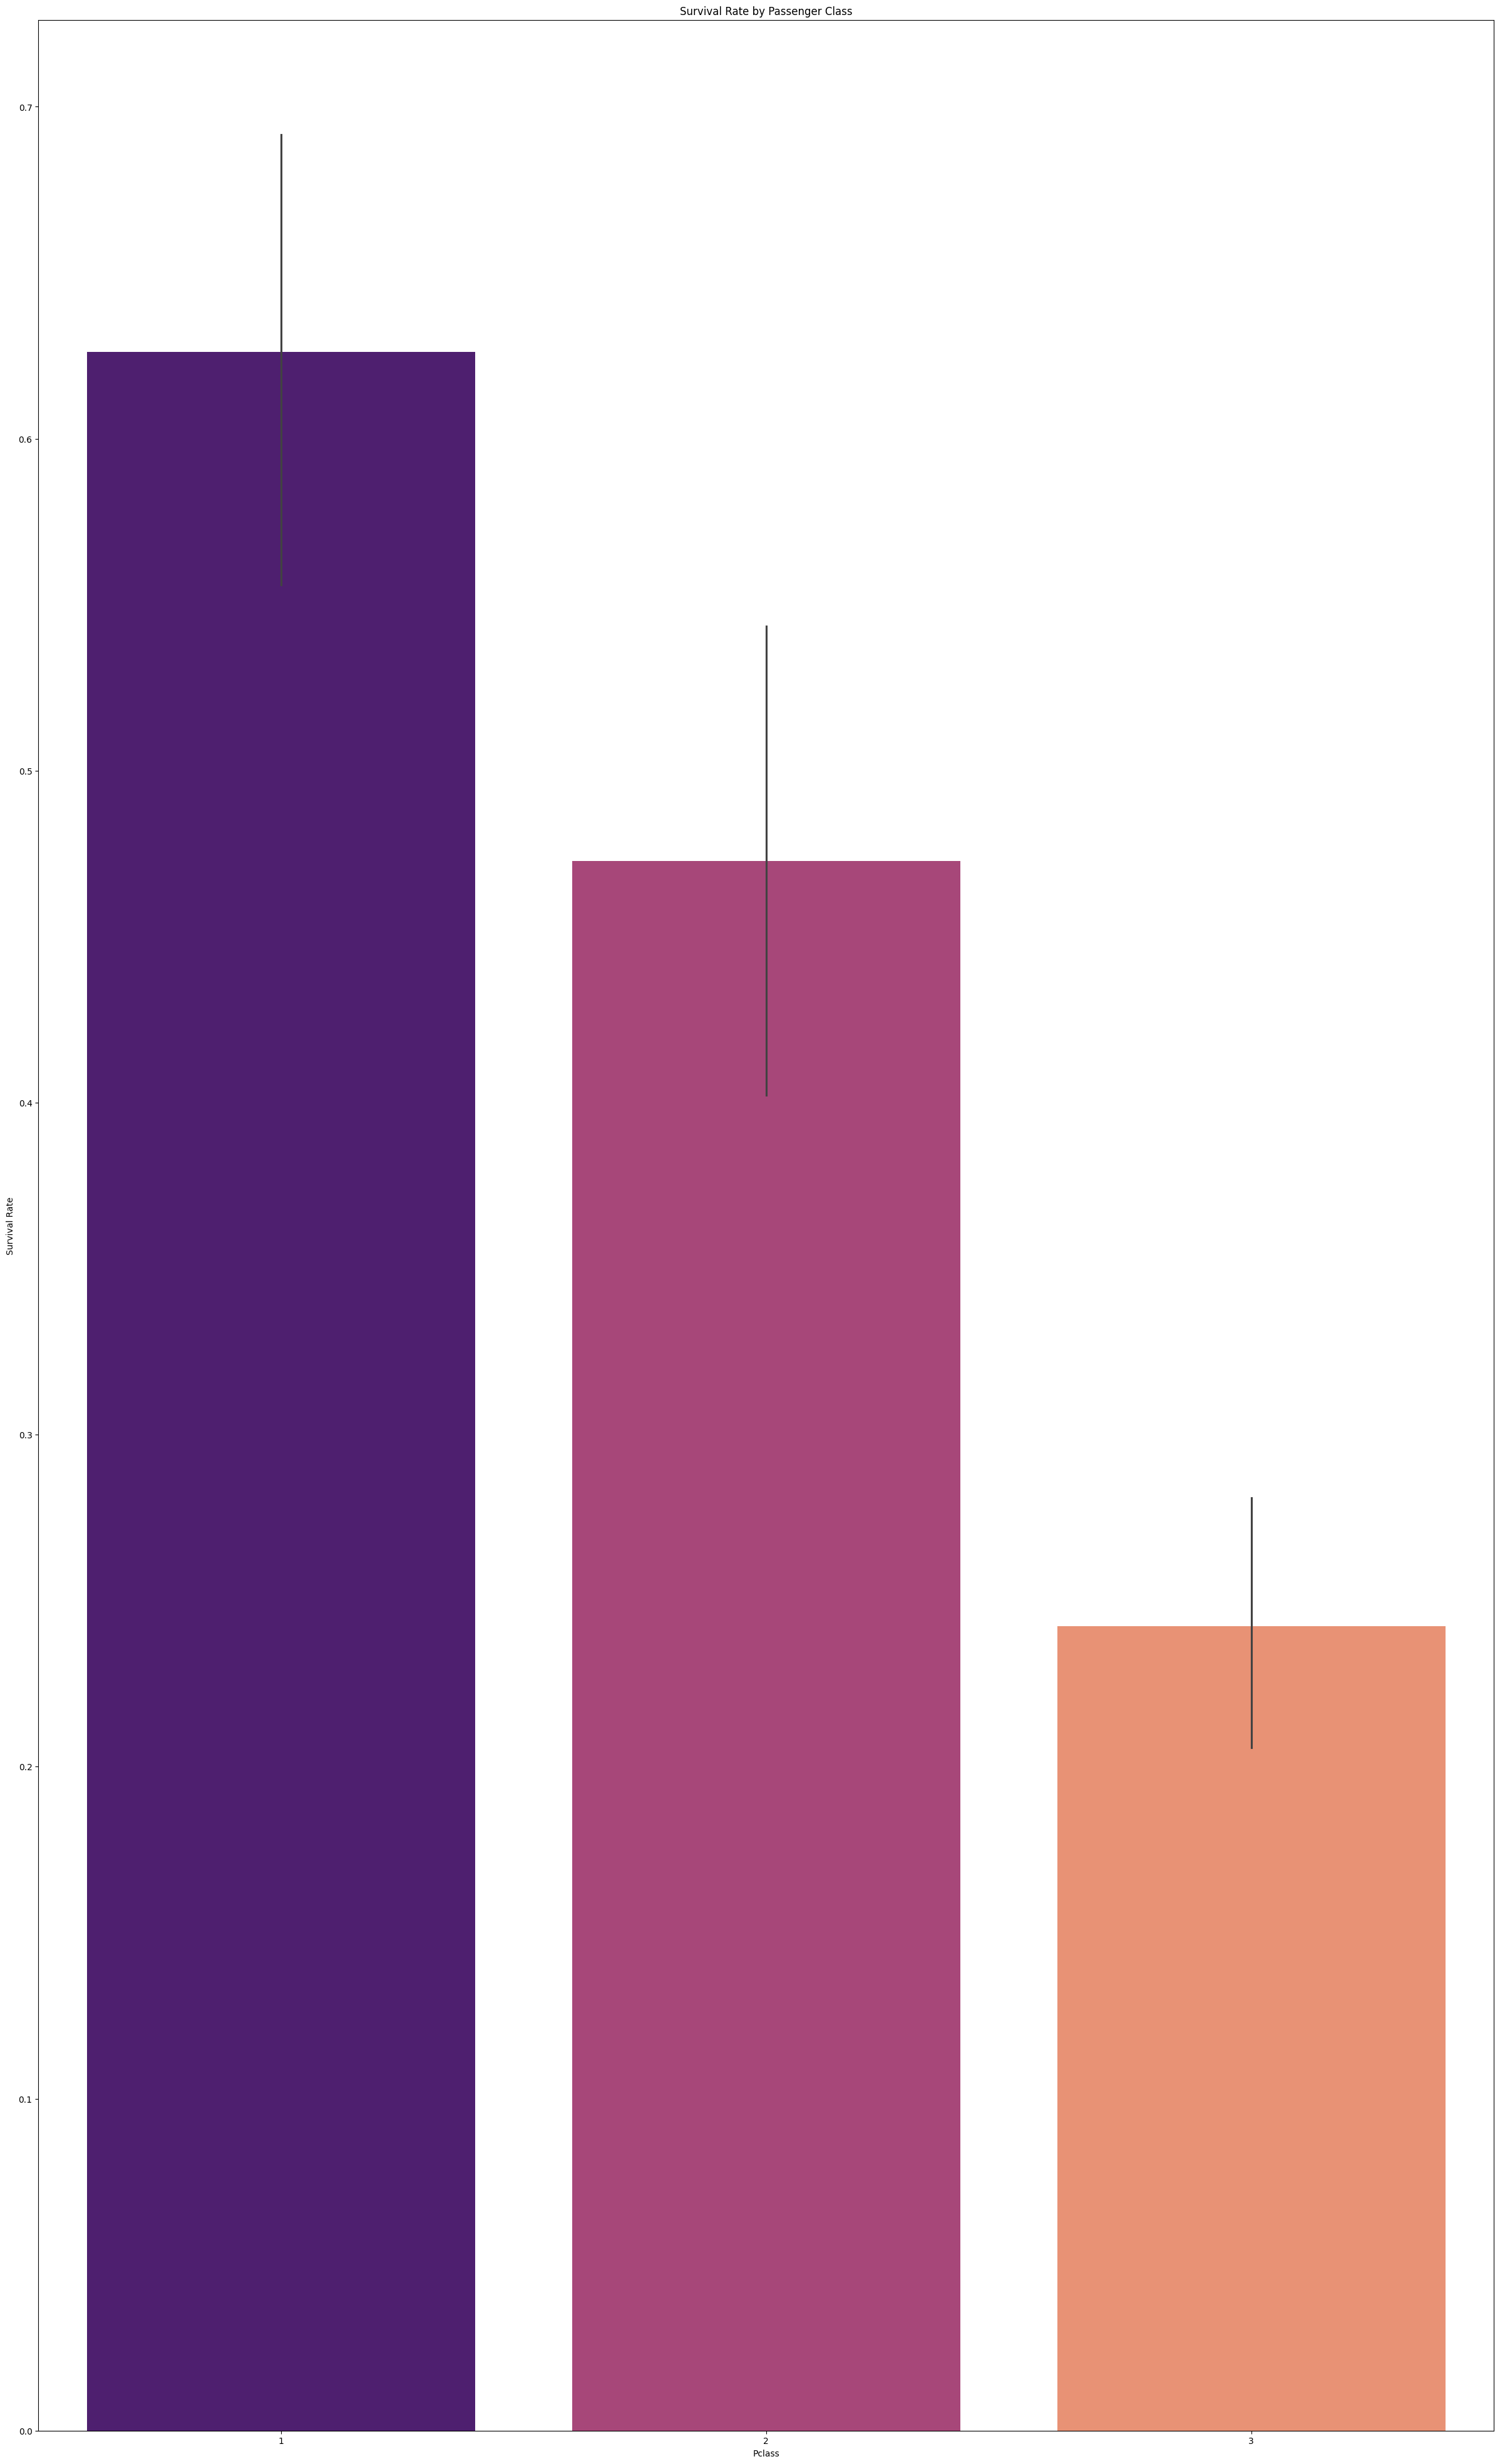

In [18]:
sns.barplot(x='Pclass', y='Survived', data=df2 , palette='magma')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

<ipython-input-19-35063abd882b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SibSp', y='Survived', data=df2 , palette='turbo')


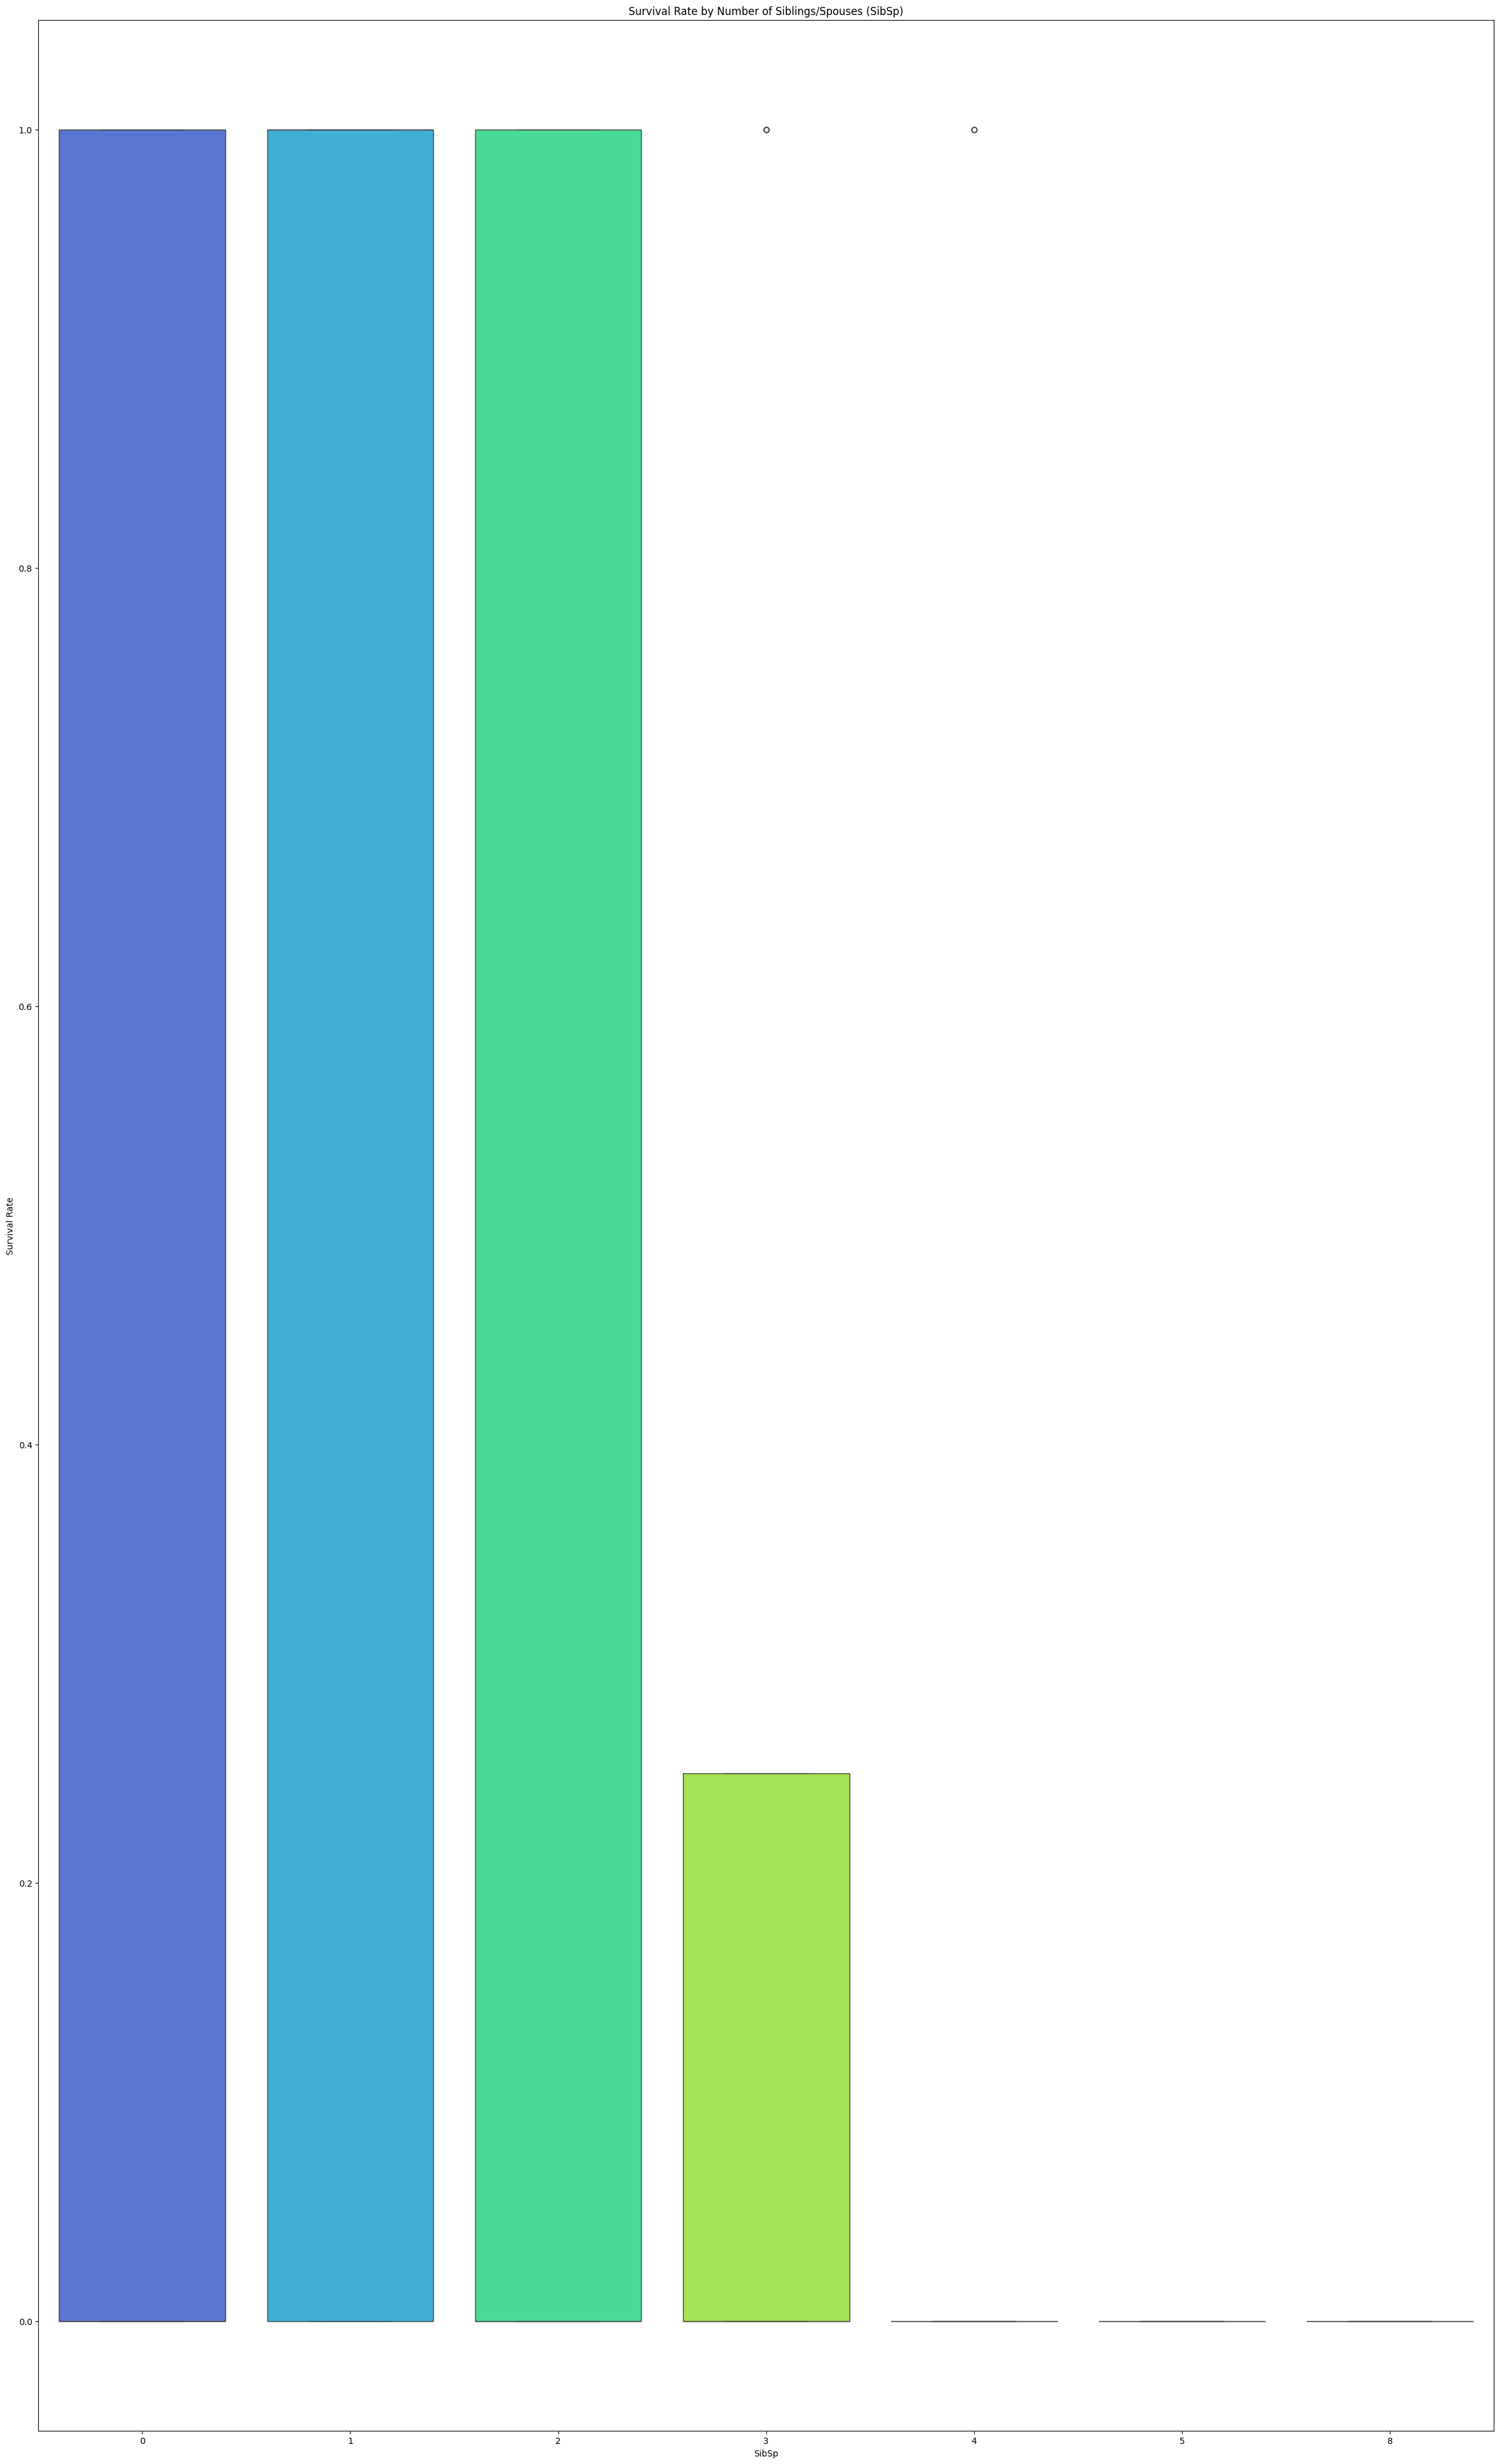

<ipython-input-19-35063abd882b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Parch', y='Survived', data=df2, palette='turbo')


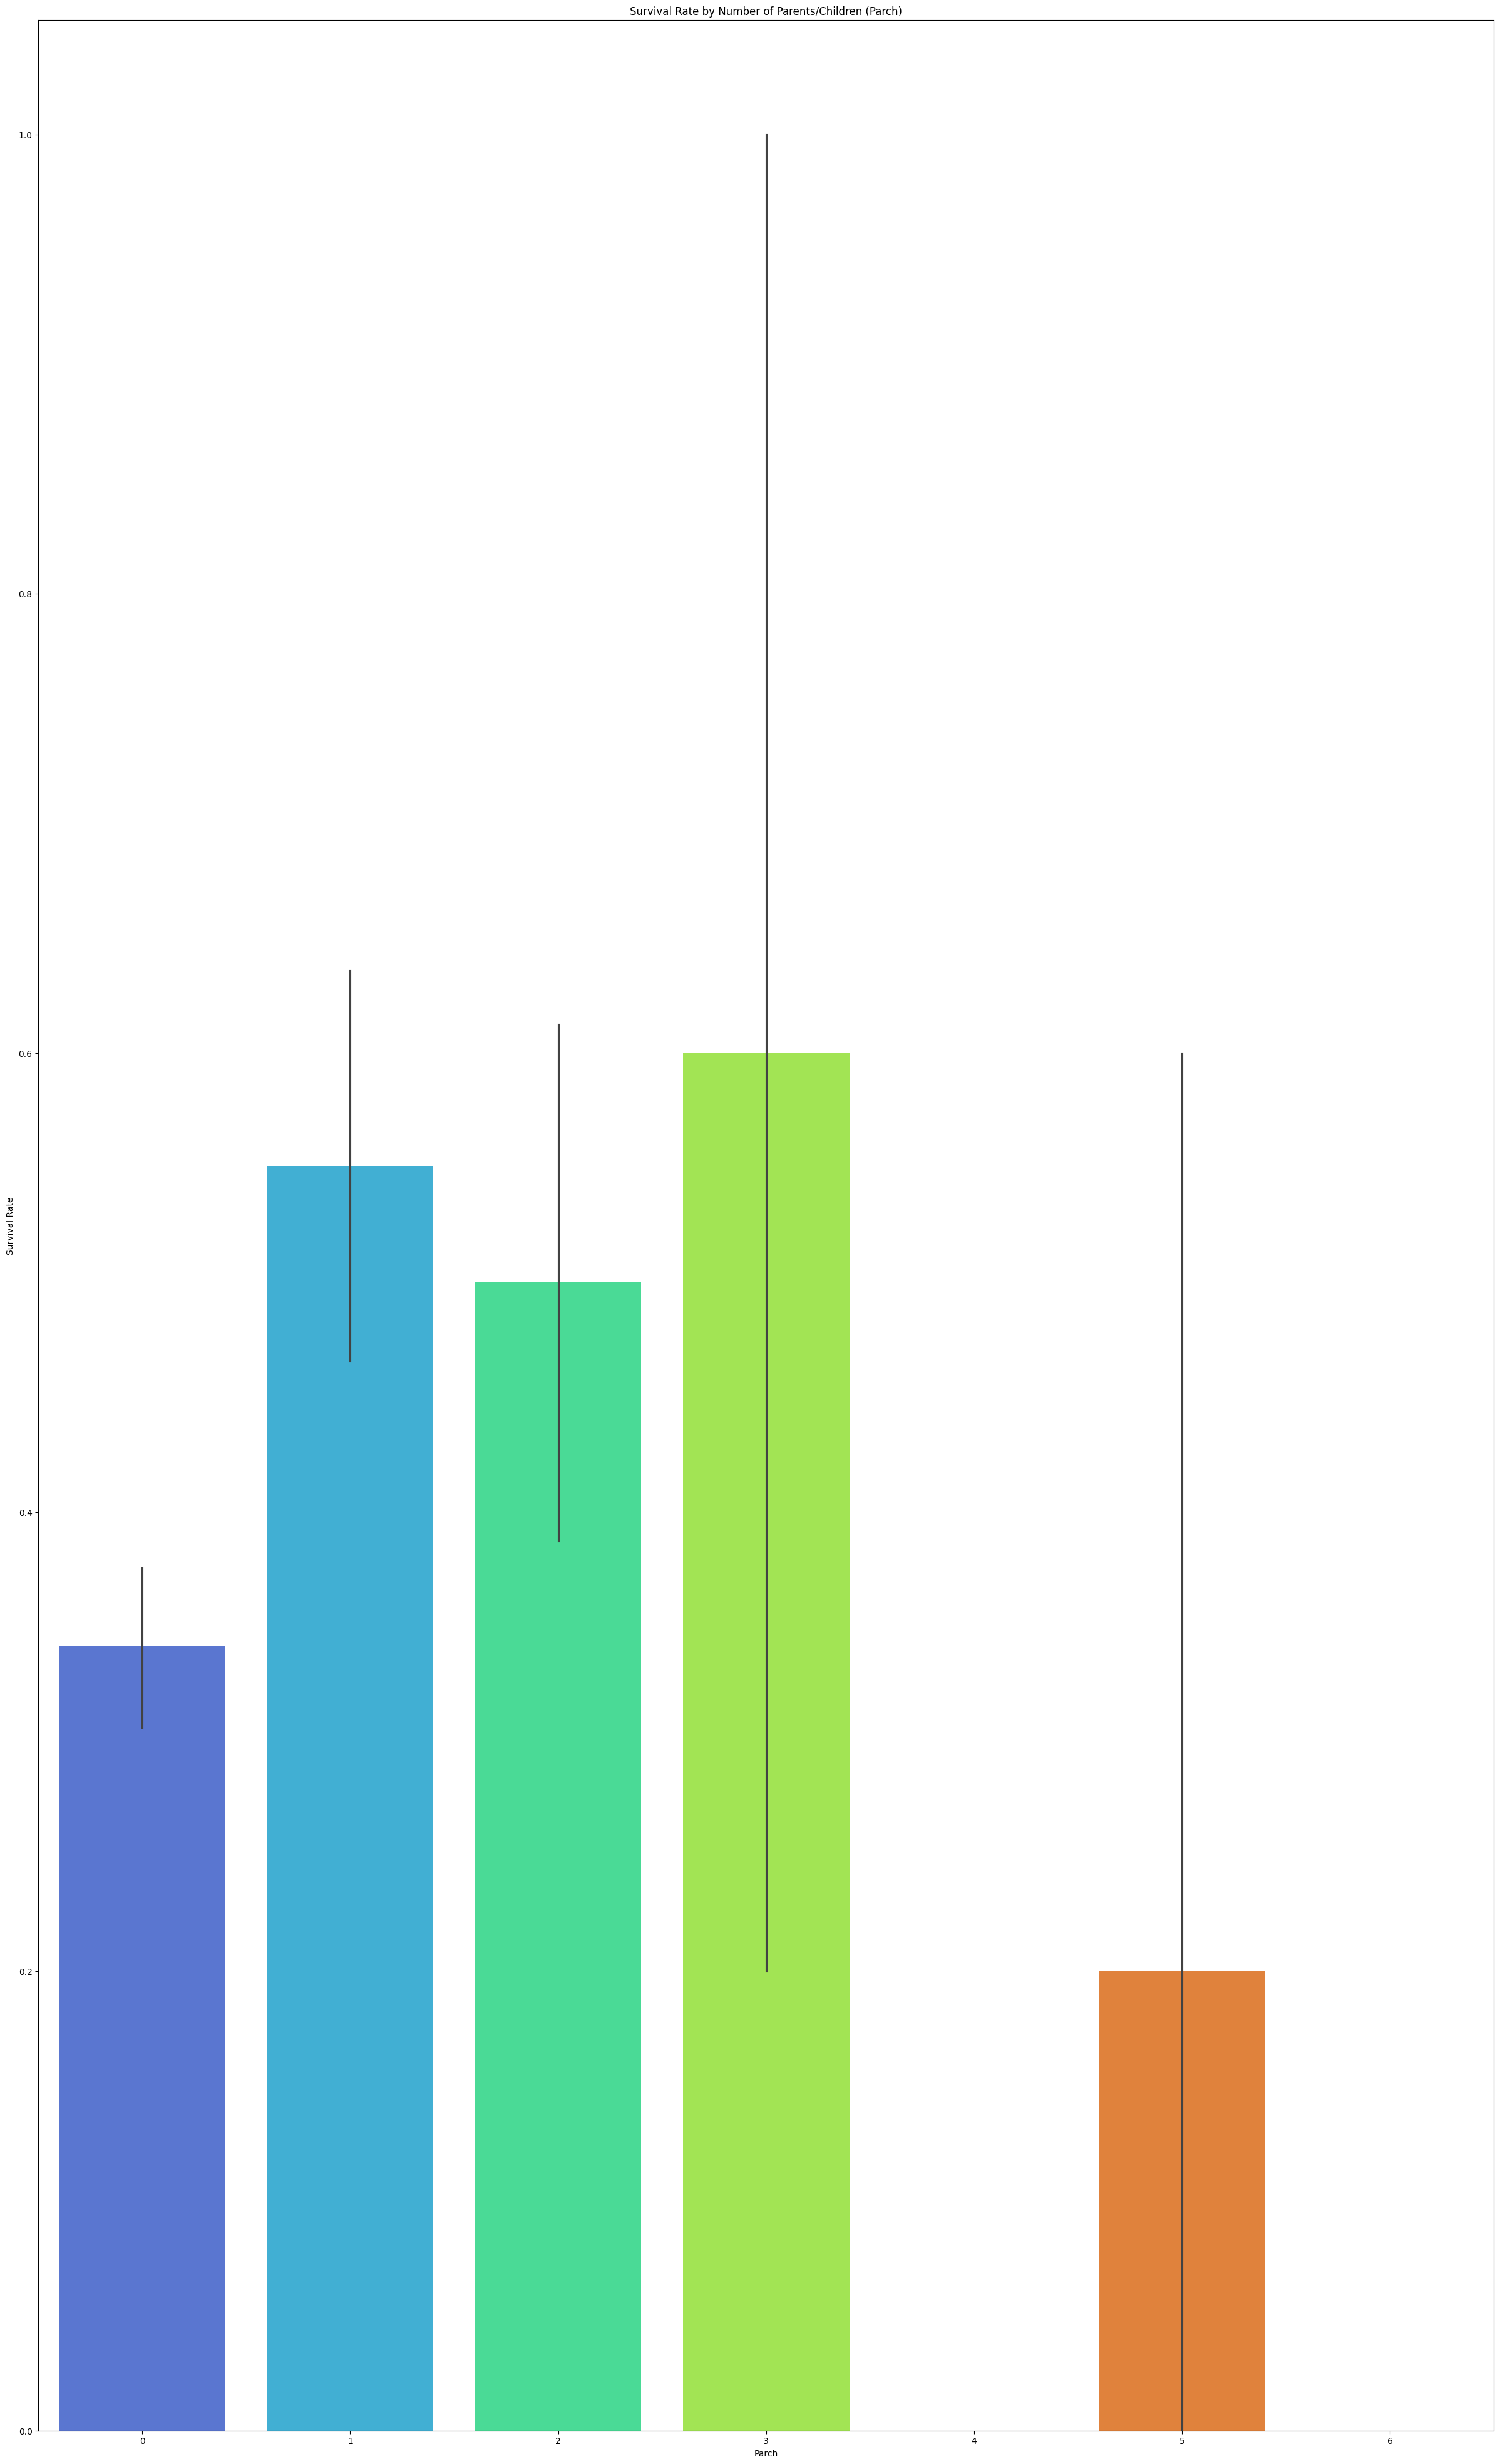

In [19]:
sns.boxplot(x='SibSp', y='Survived', data=df2 , palette='turbo')
plt.title('Survival Rate by Number of Siblings/Spouses (SibSp)')
plt.xlabel('SibSp')
plt.ylabel('Survival Rate')
plt.show()

sns.barplot(x='Parch', y='Survived', data=df2, palette='turbo')
plt.title('Survival Rate by Number of Parents/Children (Parch)')
plt.xlabel('Parch')
plt.ylabel('Survival Rate')
plt.show()

# RESTAURANT TIPS DATASET NUMPY ,PANDAS ,MATPLOTLIB, AND SEABORN

In [23]:
df3.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
df3.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [21]:
df3.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [25]:
df3.drop_duplicates(inplace=True)

<ipython-input-35-5a44c8e65d76>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='total_bill', x='day', data=df3 , palette='turbo')


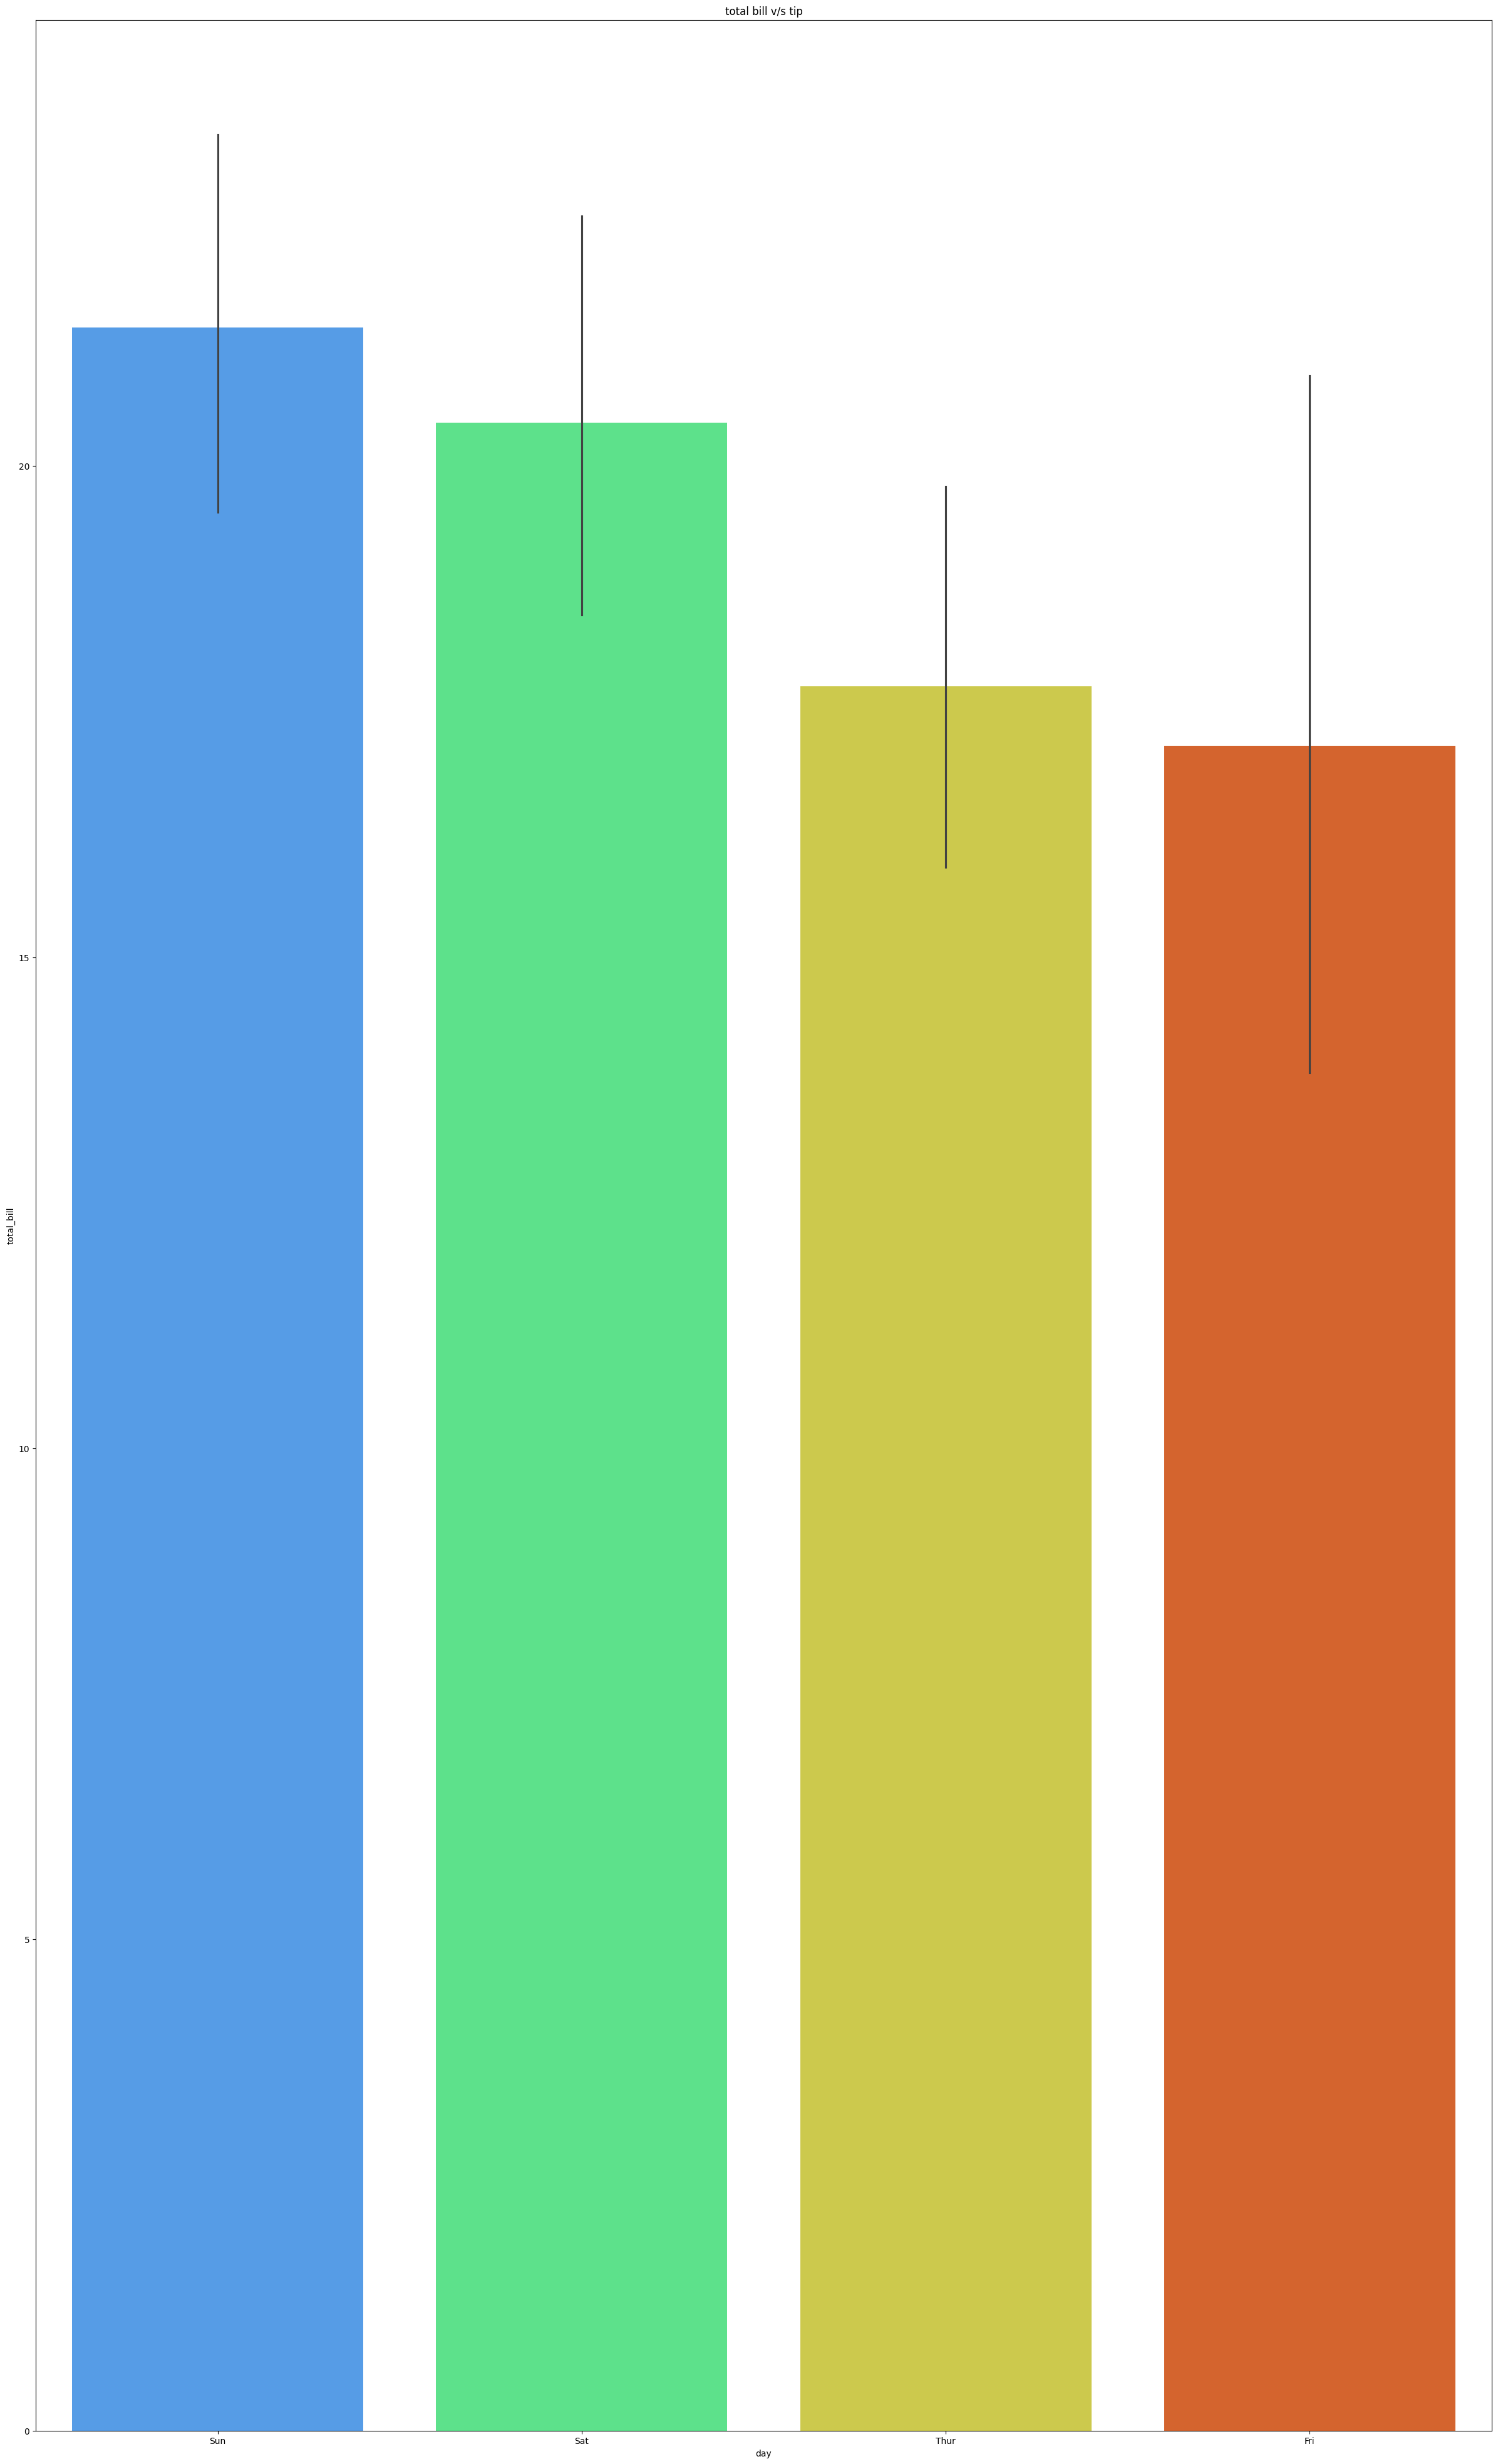

In [35]:
sns.barplot(y='total_bill', x='day', data=df3 , palette='turbo')
plt.title('total bill v/s tip')
plt.ylabel('total_bill')
plt.xlabel('day')
plt.show()